# Compare two GCHP datasets

## Overview of this Notebook

* Import dependencies
* Define data directories and global variables
* Compare SpeciesConc diagnostic collection

NOTE: Use this notebook with the 1mo_benchmark branch of gcpy

## Import dependencies

In [1]:
import os
import numpy as np
import xarray as xr
import gcpy

# Enable auto-reloading modules
%load_ext autoreload
%autoreload 2

%matplotlib inline
import warnings; warnings.filterwarnings("ignore")

## Define directories and global information

In [2]:
# Shared high-level directory
testdir = '/Users/lizzielundgren/gc/benchmark/multirun'

# Ref and dev run output directories
refdir = os.path.join(testdir,'single')
devdir = os.path.join(testdir,'multi_add2intstate')

# Ref and dev strings (for use in plots and messages)
refstr='Single run, 2nd month'
devstr='Multi-run with updated int state, 2nd month'

# Set directory to store plots
plotsdir = os.path.join(testdir,'plots/single_vs_multi_add2intstate')

# Set directory to store regridding weights
weightsdir = '/Users/lizzielundgren/gc/weights'

# Check that paths exist
gcpy.check_paths(refdir, devdir)

Path 1 exists: /Users/lizzielundgren/gc/benchmark/multirun/single
Path 2 exists: /Users/lizzielundgren/gc/benchmark/multirun/multi_add2intstate


### Print Ref netcdf filenames

In [3]:
reffiles = [k for k in os.listdir(refdir) if '.nc' in k]
for k in reffiles:
    print(k)

GCHP.SpeciesConc_avg.20160816_1200z.nc4


### Print Dev netcdf filenames

In [4]:
devfiles = [k for k in os.listdir(devdir) if '.nc' in k]
for k in devfiles:
    print(k)

GCHP.SpeciesConc_avg.20160816_1200z.nc4


## Inspect time-averaged species concentration diagnostic

In [5]:
day = '20160816'
time = '1200'
collection = 'SpeciesConc_avg'
refdata = gcpy.get_gchp_collection_data(refdir, collection, day, time)
devdata = gcpy.get_gchp_collection_data(devdir, collection, day, time)

In [6]:
[commonvars, commonvars1D, commonvars2D, commonvars3D] = gcpy.compare_varnames(refdata, devdata)

183 common variables
0 variables in ref only
0 variables in dev only
All variables have same dimensions in ref and dev


In [7]:
CFCs=[k for k in commonvars if 'CFC' in k]
print(CFCs)

['SpeciesConc_CFC11', 'SpeciesConc_CFC113', 'SpeciesConc_CFC114', 'SpeciesConc_CFC115', 'SpeciesConc_CFC12', 'SpeciesConc_HCFC123', 'SpeciesConc_HCFC141b', 'SpeciesConc_HCFC142b', 'SpeciesConc_HCFC22']


In [8]:
varname='SpeciesConc_O3'
gcpy.get_stats(refdata, refstr, devdata, devstr, varname)

Data units: mol mol-1 dry
Array sizes:
    Single run, 2nd month:  (1, 72, 288, 48)
    Multi-run with updated int state, 2nd month:  (1, 72, 288, 48)
Global stats:
  Mean:
    Single run, 2nd month:  1.8323707990930416e-06
    Multi-run with updated int state, 2nd month:  1.8360536842010333e-06
  Min:
    Single run, 2nd month:  2.618878225391086e-09
    Multi-run with updated int state, 2nd month:  2.833995482731666e-09
  Max:
    Single run, 2nd month:  1.015227007883368e-05
    Multi-run with updated int state, 2nd month:  1.00710740298382e-05
  Sum:
    Single run, 2nd month:  1.8238098621368408
    Multi-run with updated int state, 2nd month:  1.8274757862091064


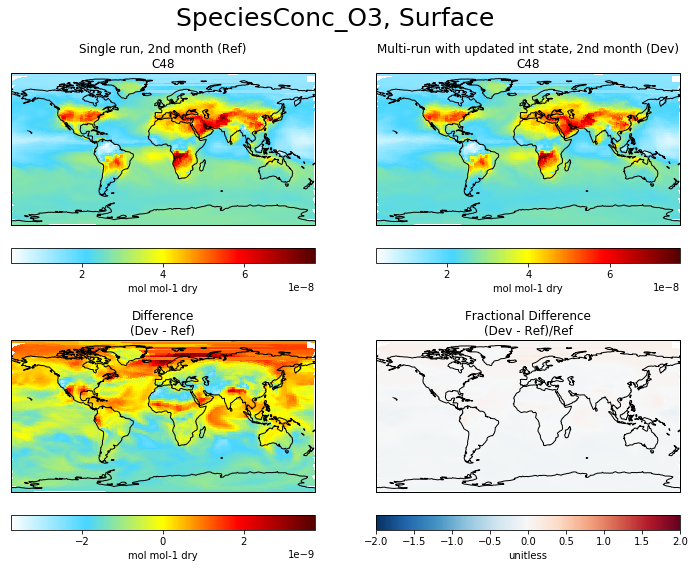

In [9]:
gcpy.compare_gchp_single_level(refdata, refstr, devdata, devstr, varlist=[varname], weightsdir=weightsdir)

Reuse existing file: /Users/lizzielundgren/gc/weights/conservative_c48_1x1.25_0.nc
Reuse existing file: /Users/lizzielundgren/gc/weights/conservative_c48_1x1.25_1.nc
Reuse existing file: /Users/lizzielundgren/gc/weights/conservative_c48_1x1.25_2.nc
Reuse existing file: /Users/lizzielundgren/gc/weights/conservative_c48_1x1.25_3.nc
Reuse existing file: /Users/lizzielundgren/gc/weights/conservative_c48_1x1.25_4.nc
Reuse existing file: /Users/lizzielundgren/gc/weights/conservative_c48_1x1.25_5.nc
Reuse existing file: /Users/lizzielundgren/gc/weights/conservative_c48_1x1.25_0.nc
Reuse existing file: /Users/lizzielundgren/gc/weights/conservative_c48_1x1.25_1.nc
Reuse existing file: /Users/lizzielundgren/gc/weights/conservative_c48_1x1.25_2.nc
Reuse existing file: /Users/lizzielundgren/gc/weights/conservative_c48_1x1.25_3.nc
Reuse existing file: /Users/lizzielundgren/gc/weights/conservative_c48_1x1.25_4.nc
Reuse existing file: /Users/lizzielundgren/gc/weights/conservative_c48_1x1.25_5.nc


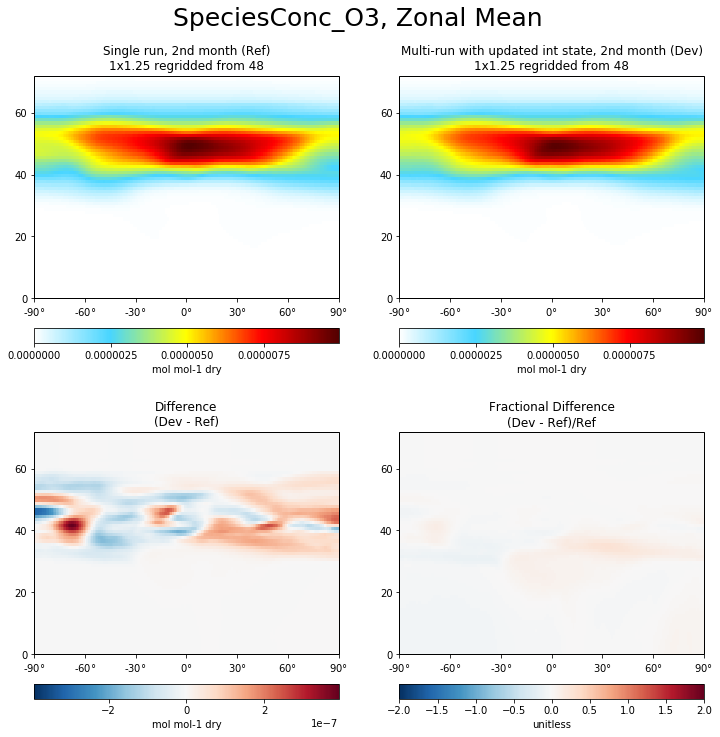

In [10]:
gcpy.compare_gchp_zonal_mean(refdata, refstr, devdata, devstr, varlist=[varname], weightsdir=weightsdir )

## Create PDF for list of species

In [11]:
# Define subset of variables in files
varlist = commonvars3D
#varlist = [varname]
#varlist = [k for k in commonvars3D if 'CFC' in k]

In [12]:
# Surface
pdfname = os.path.join(plotsdir,'{}_Surface.pdf'.format(collection))
#pdfname = os.path.join(plotsdir,'{}_Surface.pdf'.format(varname))
#pdfname = os.path.join(plotsdir,'{}_Surface.pdf'.format('CFCs'))
gcpy.compare_gchp_single_level(refdata, refstr, devdata, devstr, varlist=varlist, ilev=0,
                     weightsdir=weightsdir, savepdf=True, pdfname=pdfname )
gcpy.add_bookmarks_to_pdf( pdfname, varlist, remove_prefix='SpeciesConc_')


Creating /Users/lizzielundgren/gc/benchmark/multirun/plots/single_vs_multi_add2intstate/SpeciesConc_avg_Surface.pdf for 183 variables
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 

In [13]:
# Zonal mean
pdfname = os.path.join(plotsdir,'{}_ZonalMean.pdf'.format(collection))
#pdfname = os.path.join(plotsdir,'{}_ZonalMean.pdf'.format(varname))
#pdfname = os.path.join(plotsdir,'{}_ZonalMean.pdf'.format('CFCs'))
gcpy.compare_gchp_zonal_mean(refdata, refstr, devdata, devstr, varlist=varlist, 
                   weightsdir=weightsdir, savepdf=True, pdfname=pdfname )
gcpy.add_bookmarks_to_pdf( pdfname, varlist, remove_prefix='SpeciesConc_')

Reuse existing file: /Users/lizzielundgren/gc/weights/conservative_c48_1x1.25_0.nc
Reuse existing file: /Users/lizzielundgren/gc/weights/conservative_c48_1x1.25_1.nc
Reuse existing file: /Users/lizzielundgren/gc/weights/conservative_c48_1x1.25_2.nc
Reuse existing file: /Users/lizzielundgren/gc/weights/conservative_c48_1x1.25_3.nc
Reuse existing file: /Users/lizzielundgren/gc/weights/conservative_c48_1x1.25_4.nc
Reuse existing file: /Users/lizzielundgren/gc/weights/conservative_c48_1x1.25_5.nc
Reuse existing file: /Users/lizzielundgren/gc/weights/conservative_c48_1x1.25_0.nc
Reuse existing file: /Users/lizzielundgren/gc/weights/conservative_c48_1x1.25_1.nc
Reuse existing file: /Users/lizzielundgren/gc/weights/conservative_c48_1x1.25_2.nc
Reuse existing file: /Users/lizzielundgren/gc/weights/conservative_c48_1x1.25_3.nc
Reuse existing file: /Users/lizzielundgren/gc/weights/conservative_c48_1x1.25_4.nc
Reuse existing file: /Users/lizzielundgren/gc/weights/conservative_c48_1x1.25_5.nc

Cre